<a href="https://colab.research.google.com/github/SARIKELLA-MADHU/Machine-Learning/blob/main/ML_week_9_(U5)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Input data (AND gate)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])  # AND output

# Initialize weights and bias
w = np.zeros(X.shape[1])
b = 0
lr = 0.1  # learning rate

# Training loop
for epoch in range(10):
    for i in range(len(X)):
        y_pred = np.dot(X[i], w) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y[i] - y_pred
        w += lr * error * X[i]
        b += lr * error

print("Weights:", w, "Bias:", b)


Weights: [0.2 0.1] Bias: -0.2


In [2]:
import numpy as np

def activation(x):
    return 1 if x >= 0 else 0

def perceptron_train(X, y, lr=0.1, epochs=10):
    w = np.zeros(X.shape[1])
    b = 0
    for _ in range(epochs):
        for i in range(len(X)):
            z = np.dot(X[i], w) + b
            y_pred = activation(z)
            error = y[i] - y_pred
            w += lr * error * X[i]
            b += lr * error
    return w, b

# AND gate
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([0,0,0,1])
w, b = perceptron_train(X, y_and)
print("AND weights:", w, "bias:", b)

# OR gate
y_or = np.array([0,1,1,1])
w, b = perceptron_train(X, y_or)
print("OR weights:", w, "bias:", b)


AND weights: [0.2 0.1] bias: -0.20000000000000004
OR weights: [0.1 0.1] bias: -0.1


In [3]:
from sklearn.neural_network import MLPClassifier

X = [[0,0],[0,1],[1,0],[1,1]]
y = [0,1,1,0]

model = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', max_iter=5000)
model.fit(X, y)

print("Predictions:", model.predict(X))


Predictions: [0 0 1 1]


In [5]:
from sklearn.neural_network import MLPClassifier

X = [[0,0],[0,1],[1,0],[1,1]]
y = [0,1,1,0]  # XOR

for neurons in [2, 4, 6, 8]:
    model = MLPClassifier(hidden_layer_sizes=(neurons,), max_iter=5000, activation='relu')
    model.fit(X, y)
    print(f"Hidden neurons: {neurons} | Accuracy: {model.score(X, y):.2f}")


Hidden neurons: 2 | Accuracy: 0.50
Hidden neurons: 4 | Accuracy: 0.75
Hidden neurons: 6 | Accuracy: 1.00
Hidden neurons: 8 | Accuracy: 1.00


In [1]:
# ⚙️ Import Libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import time

start_time = time.time()

# 🧠 Load smaller digits dataset (8x8 grayscale images)
digits = load_digits()
X, y = digits.data, digits.target

# 🔧 Scale features (important for MLP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📊 Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 🤖 Define MLP Model (fast and simple)
mlp = MLPClassifier(hidden_layer_sizes=(64,),
                    activation='relu',
                    solver='adam',
                    max_iter=50,
                    learning_rate_init=0.001,
                    early_stopping=True,
                    random_state=42,
                    verbose=True)

# 🚀 Train model
mlp.fit(X_train, y_train)

# 📈 Evaluate
print("\nTrain Accuracy:", mlp.score(X_train, y_train))
print("Test Accuracy:", mlp.score(X_test, y_test))
print("Final Loss:", mlp.loss_)
print("Training Time: %.2f seconds" % (time.time() - start_time))


Iteration 1, loss = 2.32050420
Validation score: 0.194444
Iteration 2, loss = 1.94263864
Validation score: 0.375000
Iteration 3, loss = 1.63492736
Validation score: 0.506944
Iteration 4, loss = 1.38155446
Validation score: 0.673611
Iteration 5, loss = 1.17645235
Validation score: 0.784722
Iteration 6, loss = 1.00918333
Validation score: 0.812500
Iteration 7, loss = 0.87750919
Validation score: 0.854167
Iteration 8, loss = 0.76783589
Validation score: 0.868056
Iteration 9, loss = 0.67758609
Validation score: 0.875000
Iteration 10, loss = 0.60276193
Validation score: 0.881944
Iteration 11, loss = 0.53915579
Validation score: 0.895833
Iteration 12, loss = 0.48558924
Validation score: 0.902778
Iteration 13, loss = 0.43946204
Validation score: 0.902778
Iteration 14, loss = 0.39963385
Validation score: 0.902778
Iteration 15, loss = 0.36546901
Validation score: 0.902778
Iteration 16, loss = 0.33595574
Validation score: 0.909722
Iteration 17, loss = 0.30972435
Validation score: 0.916667
Iterat

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


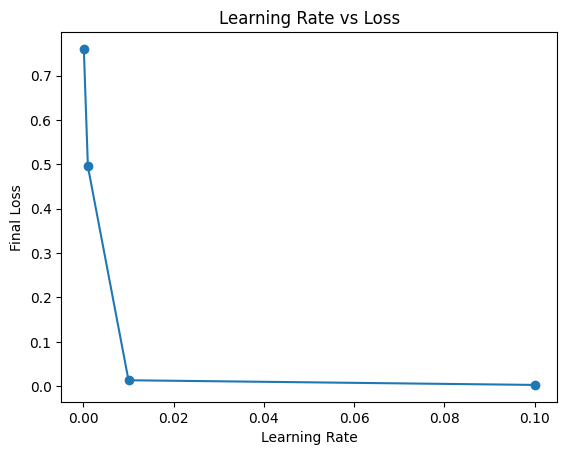

In [8]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

lrs = [0.0001, 0.001, 0.01, 0.1]
losses = []

for lr in lrs:
    mlp = MLPClassifier(hidden_layer_sizes=(5,), learning_rate_init=lr, max_iter=500)
    mlp.fit(X, y)
    losses.append(mlp.loss_)

plt.plot(lrs, losses, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Final Loss")
plt.title("Learning Rate vs Loss")
plt.show()


In [10]:
import numpy as np

neurons_list = [2, 4, 8, 16]
lr_list = [0.001, 0.01, 0.1]

for n in neurons_list:
    for lr in lr_list:
        mlp = MLPClassifier(hidden_layer_sizes=(n,), learning_rate_init=lr, max_iter=1000)
        mlp.fit(X, y)
        print(f"Neurons: {n}, LR: {lr}, Loss: {mlp.loss_:.4f}")


Neurons: 2, LR: 0.001, Loss: 0.7070
Neurons: 2, LR: 0.01, Loss: 0.0306
Neurons: 2, LR: 0.1, Loss: 0.6981
Neurons: 4, LR: 0.001, Loss: 0.5380
Neurons: 4, LR: 0.01, Loss: 0.6933
Neurons: 4, LR: 0.1, Loss: 0.0029


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 8, LR: 0.001, Loss: 0.2550
Neurons: 8, LR: 0.01, Loss: 0.0138
Neurons: 8, LR: 0.1, Loss: 0.0068


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Neurons: 16, LR: 0.001, Loss: 0.2180
Neurons: 16, LR: 0.01, Loss: 0.0100
Neurons: 16, LR: 0.1, Loss: 0.0015
